In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-18fcz36j
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-18fcz36j
  Resolved https://github.com/huggingface/transformers.git to commit 17a55534f5e5df10ac4804d4270bf6b8cc24998d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.1 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.30.0.dev0-py3-none-any.whl size=7102950 sha256=62cb6f4cd4127e1a4dde345b840a3042f946dab19c0348685f87e794cb574222
  Stored in directory: /tmp

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
import pandas as pd
import json
import gc
from keras import callbacks

In [ ]:
df = pd.read_csv("vendor_operation_categories_labelling.csv")

In [ ]:
df.head()

,entry,transaction_category
0,MARKUP FEES CAIRO,Utilities
1,Cash Deposit,Cash
2,ATM WITHDRAWAL,Cash
3,Credit Interest,Investment
4,PAYMENT RECEIVED INTERNET,Transfers


In [ ]:
df["text"] = df["entry"]
df["label"] = df["transaction_category"]

In [ ]:
df = df[["text", "label"]]

In [ ]:
df.dropna(subset=["label"], inplace=True)

In [ ]:
df

,text,label
0,MARKUP FEES CAIRO,Utilities
1,Cash Deposit,Cash
2,ATM WITHDRAWAL,Cash
3,Credit Interest,Investment
4,PAYMENT RECEIVED INTERNET,Transfers
...,...,...
207,AMAZON MARKETPLACE,Shopping
208,Uber,Transportation
209,APPLE,General
210,MCDONALD,Restaurants


In [ ]:
df["label"].unique()

array(['Utilities', 'Cash', 'Investment', 'Transfers', 'Entertainment',
       'Restaurants', 'Shopping', 'Others', 'Groceries', 'Travel',
       'Health', 'Services', 'Transportation', 'General'], dtype=object)

In [ ]:
df["encoded_label"] = df["label"].astype('category').cat.codes

In [ ]:
df

,text,label,encoded_label
0,MARKUP FEES CAIRO,Utilities,13
1,Cash Deposit,Cash,0
2,ATM WITHDRAWAL,Cash,0
3,Credit Interest,Investment,5
4,PAYMENT RECEIVED INTERNET,Transfers,10
...,...,...,...
207,AMAZON MARKETPLACE,Shopping,9
208,Uber,Transportation,11
209,APPLE,General,2
210,MCDONALD,Restaurants,7


In [ ]:
data_texts = df["text"].to_list()
data_labels = df["encoded_label"].to_list()

In [ ]:
df["label"].nunique()

14

In [ ]:
df

,text,label,encoded_label
0,MARKUP FEES CAIRO,Utilities,13
1,Cash Deposit,Cash,0
2,ATM WITHDRAWAL,Cash,0
3,Credit Interest,Investment,5
4,PAYMENT RECEIVED INTERNET,Transfers,10
...,...,...,...
207,AMAZON MARKETPLACE,Shopping,9
208,Uber,Transportation,11
209,APPLE,General,2
210,MCDONALD,Restaurants,7


In [ ]:
data_texts

['MARKUP FEES CAIRO',
 'Cash Deposit',
 'ATM WITHDRAWAL',
 'Credit Interest',
 'PAYMENT RECEIVED INTERNET',
 'FOREIGN EXCHANGE FEES',
 'Inward ACH',
 'IPN Outward',
 'Outward Online Transfer',
 'INSURANCE FEE SOLIDARITY',
 'CASH BACK REDEMPTION',
 'Account Transfer',
 'ATM DEPOSIT',
 'CASH BACK CAIRO',
 'Payment Direct Debit',
 'Annual fee',
 'Fees Account Transfer',
 'Online Transfer',
 'Reverse Annual fee',
 'ATM CARDLESS DEPOSIT',
 'Solidarity Scheme',
 'Debit Interest',
 'Inward CO/ Funds',
 'OTT SIDE BY SIDEMEN',
 'PROCAR',
 'COCO',
 'Netflix.com',
 'ST WITH AIRO',
 'PRIME PICK UP',
 'BEANO',
 'Elrefaay',
 'FELIXMERCHANT',
 'Sphinx Publishing',
 'LYCHEE FRUIT BAR',
 'OLA',
 'ALEXOTEL',
 'BUFFALO WINGS AND RI',
 'VF FIT',
 'Udemy',
 'ZALANDOSE',
 'FLAMINGO',
 'GALAXYGYM',
 'MAX MUSCLE',
 'TBS',
 'COSTA',
 'BAVARIAN AUTO',
 'EL MAJD',
 'ORANGE',
 'JIMMYS',
 'EMARAT',
 'DECATHLON',
 'oscar',
 'GHATATY',
 'Uber BV',
 'shiren',
 'APEX CO.',
 'DUNKIN DONUTS',
 'MOBIL ONE',
 'AZZAM WATCH

In [ ]:
data_labels

[13,
 0,
 0,
 5,
 10,
 13,
 10,
 10,
 10,
 13,
 10,
 10,
 0,
 10,
 10,
 13,
 13,
 10,
 13,
 0,
 13,
 5,
 10,
 1,
 7,
 9,
 1,
 6,
 3,
 7,
 7,
 9,
 9,
 7,
 13,
 12,
 7,
 4,
 8,
 9,
 3,
 4,
 4,
 7,
 7,
 13,
 4,
 13,
 7,
 13,
 9,
 3,
 13,
 11,
 4,
 6,
 7,
 13,
 9,
 8,
 7,
 7,
 3,
 8,
 7,
 9,
 7,
 8,
 7,
 7,
 4,
 9,
 9,
 7,
 13,
 13,
 7,
 13,
 9,
 3,
 11,
 7,
 1,
 4,
 7,
 7,
 3,
 13,
 7,
 4,
 7,
 7,
 13,
 8,
 6,
 1,
 7,
 1,
 9,
 13,
 8,
 7,
 3,
 7,
 3,
 9,
 13,
 13,
 7,
 7,
 9,
 3,
 7,
 13,
 8,
 9,
 7,
 8,
 7,
 7,
 4,
 7,
 7,
 7,
 7,
 8,
 7,
 3,
 1,
 2,
 2,
 3,
 11,
 9,
 13,
 3,
 7,
 3,
 13,
 7,
 13,
 9,
 9,
 7,
 4,
 8,
 3,
 7,
 13,
 6,
 7,
 8,
 4,
 13,
 7,
 7,
 7,
 9,
 3,
 13,
 7,
 9,
 7,
 8,
 3,
 13,
 3,
 3,
 2,
 7,
 7,
 8,
 7,
 7,
 1,
 8,
 3,
 3,
 4,
 7,
 7,
 7,
 8,
 3,
 3,
 3,
 8,
 7,
 7,
 8,
 3,
 3,
 3,
 9,
 3,
 7,
 8,
 3,
 7,
 8,
 3,
 7,
 7,
 7,
 8,
 3,
 9,
 11,
 2,
 7,
 4]

In [ ]:
from sklearn.model_selection import train_test_split

# Split Train and Validation data
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size=0.2, random_state=0)

# Keep some data for inference (testing)
train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size=0.01, random_state=0)

In [ ]:
len(val_texts)

43

In [ ]:
val_texts

['YATTA RESTAURANT',
 'INFINITY',
 'ATM DEPOSIT',
 'FOREIGN EXCHANGE FEES',
 'APEX CO.',
 'AIR FORCE HOSPITAL',
 'MQR Space',
 'Gourmet',
 'GHATATY',
 'MOBILATY',
 'COFFEE LAB',
 'Via Drive Thru',
 'AMAZON CO JP',
 'LINCONTRO',
 'KRISPY KREME',
 'MAHMOUD ELFAR',
 'BELGIUM FOR SWEETS',
 'RAYA SUPERMARKET',
 'MOBIL OIL',
 'Circle',
 'EMIRATES',
 'Reverse Annual fee',
 'fb',
 'Annual fee',
 'IPN Outward',
 'ACCEPT',
 'VF FIT',
 'FRESH FOOD',
 'CHILL OUT',
 'myfawry',
 'Seoudi',
 'GOVPAY',
 'STREET NO',
 'LYCHEE FRUIT BAR',
 'My fawry',
 'MASTER ON THE GO',
 'FLAMNGO',
 'SECOND CUP',
 'UPLIFT',
 'Talabat',
 'Fees Account Transfer',
 'ZIDAN MARKET',
 'HARDEES']

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [ ]:
val_encodings

{'input_ids': [[101, 8038, 5946, 4825, 102, 0, 0], [101, 15579, 102, 0, 0, 0, 0], [101, 27218, 12816, 102, 0, 0, 0], [101, 3097, 3863, 9883, 102, 0, 0], [101, 13450, 2522, 1012, 102, 0, 0], [101, 2250, 2486, 2902, 102, 0, 0], [101, 1049, 4160, 2099, 2686, 102, 0], [101, 2175, 3126, 11368, 102, 0, 0], [101, 1043, 12707, 4017, 2100, 102, 0], [101, 11240, 11733, 3723, 102, 0, 0], [101, 4157, 6845, 102, 0, 0, 0], [101, 3081, 3298, 27046, 102, 0, 0], [101, 9733, 2522, 16545, 102, 0, 0], [101, 11409, 8663, 13181, 102, 0, 0], [101, 19031, 7685, 1047, 28578, 2063, 102], [101, 27278, 17163, 2906, 102, 0, 0], [101, 5706, 2005, 26844, 102, 0, 0], [101, 4097, 2050, 17006, 102, 0, 0], [101, 11240, 4014, 3514, 102, 0, 0], [101, 4418, 102, 0, 0, 0, 0], [101, 14041, 102, 0, 0, 0, 0], [101, 7901, 3296, 7408, 102, 0, 0], [101, 1042, 2497, 102, 0, 0, 0], [101, 3296, 7408, 102, 0, 0, 0], [101, 12997, 2078, 15436, 102, 0, 0], [101, 5138, 102, 0, 0, 0, 0], [101, 1058, 2546, 4906, 102, 0, 0], [101, 4840, 283

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

In [ ]:
val_dataset

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=14)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

In [ ]:
train_dataset.shuffle(1000).batch(16)

In [ ]:
validation_data=val_dataset

In [ ]:
validation_data

In [ ]:
train_dataset

In [ ]:
val_dataset

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
checkpoint_callback = callbacks.ModelCheckpoint(
        'model.h5',
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
)

NameError: ignored

In [ ]:
model.fit(train_dataset.shuffle(1000).batch(16), epochs=50, batch_size=16,
          validation_data=val_dataset.shuffle(1000).batch(16), callbacks=[checkpoint_callback])

In [ ]:
test_loss, test_accuracy = model.evaluate(val_dataset.batch(16))

In [ ]:
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

In [ ]:
y_pred_labels = np.argmax(y_pred, axis=-1)
report = classification_report(val_labels, y_pred_labels)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
y_pred = model.predict(val_dataset.batch(16))
y_true = np.concatenate([y for x, y in val_dataset.batch(16)])
y_pred_labels = np.argmax(y_pred, axis=-1)

NameError: ignored

In [ ]:
y_pred

NameError: ignored

In [ ]:
y_test_provs = model.predict(val_dataset)

In [ ]:
y_hat = []
for prob in y_test_provs:
    y_hat.append(np.argmax(prob))

In [ ]:
y_hat

In [ ]:
report = classification_report(train_labels, y_hat)

In [ ]:
save_directory = "./drive/MyDrive/Grad/BertModelAcc" # change this to your preferred location
# save_directory = "./model"
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

In [ ]:
value_to_label = {
    0: "Cash",
    1: "Entertainment",
    2: "General",
    3: "Groceries",
    4: "Health",
    5: "Investment",
    6: "Others",
    7: "Restaurants",
    8: "Services",
    9: "Shopping",
    10: "Transfers",
    11: "Transportation",
    12: "Travel",
    13: "Utilities",
}

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
save_directory = "./drive/MyDrive/Grad/BertModel" # change this to your preferred location

In [ ]:
!pip install datasets

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-251eh7lj
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-251eh7lj
  Resolved https://github.com/huggingface/transformers.git to commit 17a55534f5e5df10ac4804d4270bf6b8cc24998d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf

In [ ]:
from datasets import load_metric

In [ ]:
metric = load_metric("accuracy")

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.saving import load_model

In [ ]:
def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)

In [ ]:
loaded_tokenizer = DistilBertTokenizer.from_pretrained(save_directory)
eval_pred = TFDistilBertForSequenceClassification.from_pretrained(save_directory)

Some layers from the model checkpoint at ./drive/MyDrive/Grad/BertModel were not used when initializing TFDistilBertForSequenceClassification: ['dropout_79']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at ./drive/MyDrive/Grad/BertModel and are newly initialized: ['dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
value_to_label = {
    0: "Cash",
    1: "Entertainment",
    2: "General",
    3: "Groceries",
    4: "Health",
    5: "Investment",
    6: "Others",
    7: "Restaurants",
    8: "Services",
    9: "Shopping",
    10: "Transfers",
    11: "Transportation",
    12: "Travel",
    13: "Utilities",
}

In [ ]:
test_encodings = loaded_tokenizer(test_texts, truncation=True, padding=True)

# Create a test dataset
# test_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(test_encodings),
#     test_labels
# ))

# Make predictions on the test dataset
y_pred = eval_pred.predict(val_dataset)
y_true = np.array(val_labels)
y_pred_labels = np.argmax(y_pred.logits, axis=-1)

# Generate classification report
report = classification_report(y_true, y_pred_labels, target_names=list(value_to_label.values()), labels=np.unique(y_true))
cm = confusion_matrix(y_true, y_pred_labels)


43/43 [==============================] - 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 9, does not match size of target_names, 14
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

In [ ]:
print(report)

                precision    recall  f1-score   support

          Cash       1.00      1.00      1.00         1
 Entertainment       0.60      0.75      0.67         8
       General       0.00      0.00      0.00         3
     Groceries       0.00      0.00      0.00         1
        Health       0.56      0.42      0.48        12
    Investment       0.80      0.80      0.80         5
        Others       0.20      0.50      0.29         2
   Restaurants       0.00      0.00      0.00         1
      Services       0.43      0.30      0.35        10

     micro avg       0.49      0.47      0.48        43
     macro avg       0.40      0.42      0.40        43
  weighted avg       0.49      0.47      0.47        43



In [ ]:
print(cm)

[[1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 2]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 3 0 0 5 0 3 0 0 1]
 [0 0 0 1 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 2 0 0 3 0 3]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

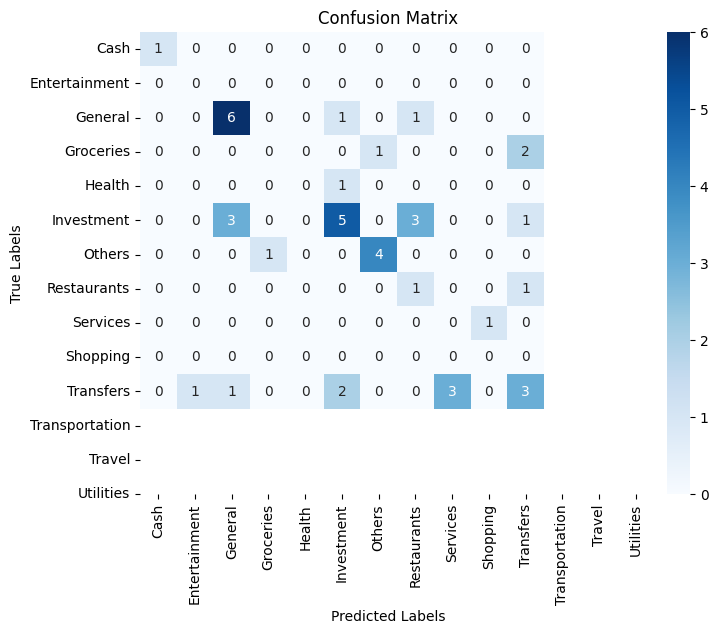

In [ ]:
class_labels = list(value_to_label.values())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()user

In [ ]:
predict_input = loaded_tokenizer.encode("DiDi",
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

output = loaded_model(predict_input)[0]

prediction_value = tf.argmax(output, axis=1).numpy()[0]
print(value_to_label[prediction_value])

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(test_texts, test_labels, verbose=0)